In [1]:
'''x=185,170,168,179,182,181,180,183,180,180,177
y=72,56,60,68,72,77,71,83,84,67,88
k2=185,72
k1=170,56
k1={1,}
k2={2,3}
ed1=root((168-185)**2+(60-72)**2)=20
ed2=root((168-170)**2+(56-72)**2)=4
k2=168+170/2,60+56/2=169,58'''

'x=185,170,168,179,182,181,180,183,180,180,177\ny=72,56,60,68,72,77,71,83,84,67,88\nk2=185,72\nk1=170,56\nk1={1,}\nk2={2,3}\ned1=root((168-185)**2+(60-72)**2)=20\ned2=root((168-170)**2+(56-72)**2)=4\nk2=168+170/2,60+56/2=169,58'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets.samples_generator import make_blobs

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


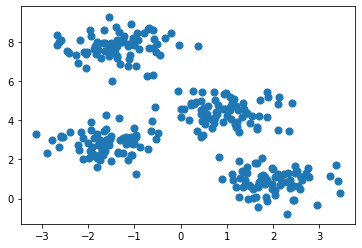

In [4]:
x,y=make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50)

In [5]:
from sklearn.cluster import KMeans

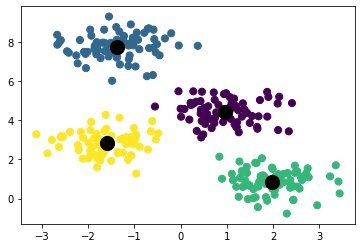

In [6]:
cls=KMeans(n_clusters=4)
cls.fit(x)
y_pr=cls.predict(x)
plt.scatter(x[:,0],x[:,1],c=y_pr,s=50,cmap="viridis")
cntrs=cls.cluster_centers_
plt.scatter(cntrs[:,0],cntrs[:,1],s=200,c='k')

In [7]:
from sklearn.datasets import make_moons

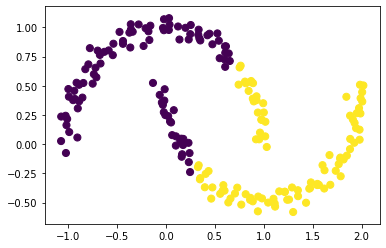

In [8]:
x,y=make_moons(200,noise=0.05,random_state=0)
labls=KMeans(2,random_state=0).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labls,s=50,cmap='viridis')

In [9]:
from sklearn.datasets import load_sample_image

In [10]:
china=load_sample_image('china.jpg')

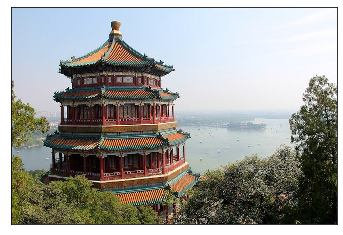

In [11]:
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [12]:
china.shape

(427, 640, 3)

In [13]:
data=china/255
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [24]:
def plot_pixls(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    rang=np.random.RandomState(0)
    i=rang.permutation(data.shape[0])[:N]
    colors=colors[i]
    r,g,b=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(r,g,color=colors,marker='.')
    ax[0].set(xlabel='red',ylabel='green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(r,b,color=colors,marker='.')
    ax[1].set(xlabel='red',ylabel='blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20)

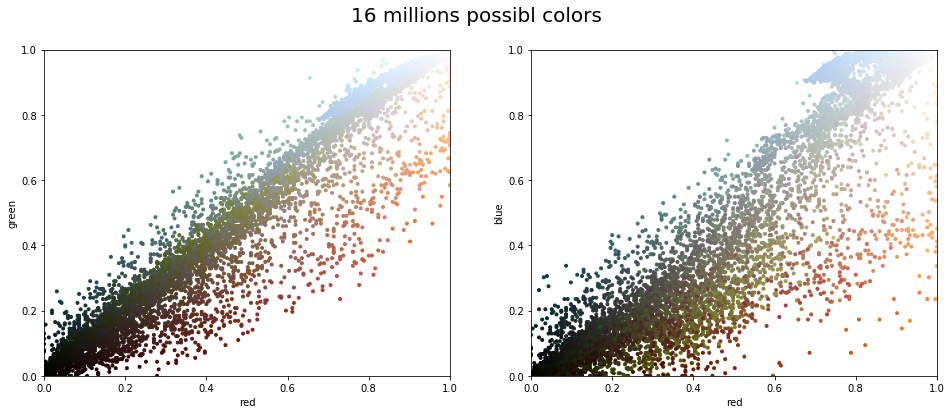

In [25]:
plot_pixls(data,"16 millions possibl colors")

In [26]:
from sklearn.cluster import MiniBatchKMeans

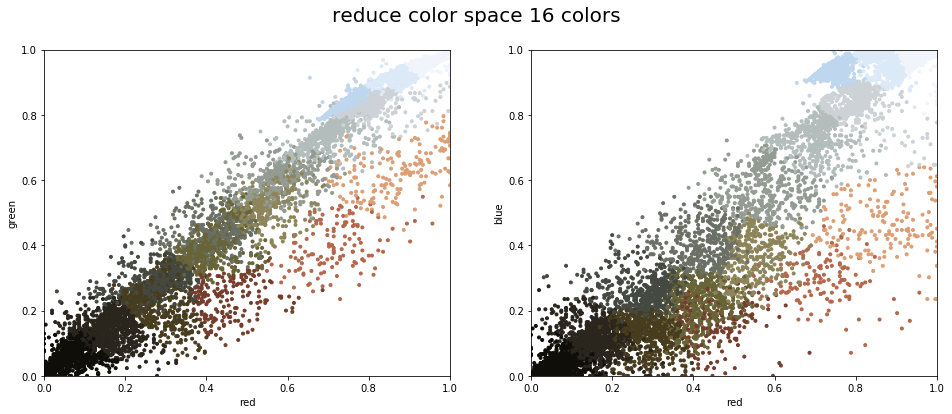

In [27]:
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
newcolors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixls(data,colors=newcolors,title="reduce color space 16 colors")

Text(0.5, 1.0, 'recolored image')

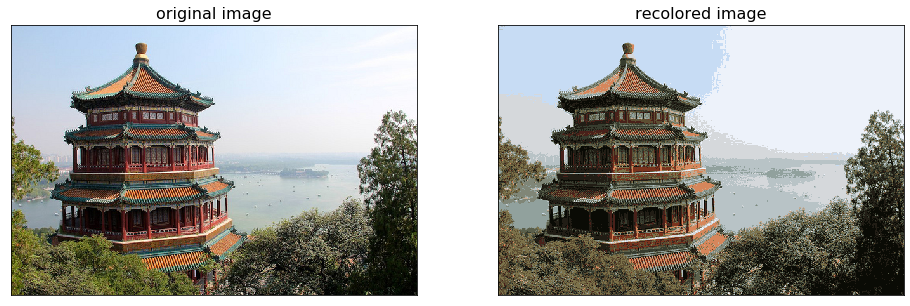

In [29]:
chinarecolored=newcolors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(china)
ax[0].set_title("original image",size=16)
ax[1].imshow(chinarecolored)
ax[1].set_title("recolored image",size=16)